In [8]:
#| include: false
library(tidyverse)
library(readxl)

Warning message:
"package 'readxl' was built under R version 4.1.3"


# Results

## Transmission distortion is common

In [34]:
# load the manual overview of the crosses in Excel format
Crosses_xlsx<-read_xlsx("~/data/trd/Crosses.xlsx", sheet=2) # should be moved to the github
mean_colonies<-summarize(Crosses_xlsx, mean(`Colonies in pool`, na.rm=TRUE))%>%pull()
sd_colonies<-summarize(Crosses_xlsx, sd(`Colonies in pool`, na.rm=TRUE))%>%pull()

New names:
* `Is in Stock` -> `Is in Stock...4`
* `Is in Stock` -> `Is in Stock...6`


In [33]:
# Load table with summarizes stats for all TRD regions
One_Table<-read_csv("03_GenomicSignals/03_OneTable.csv.gz")

Rows: 168 Columns: 60
-- Column specification ----------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (2): chr, cross
dbl (57): ID, lengthSNPs, global_start, global_end, lengthBp, start, end, PC...
lgl  (1): strongest

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [39]:
# How common is TRD?
nCrossesWithTRD<-summarize(One_Table, nCrosses=length(unique(cross)))%>%pull()

# Strength of TRD
# why NAs?
AF_summary<-summarize(One_Table, meanAF=mean(abs(AF-0.5)+0.5, na.rm=TRUE),
                     sdAF=sd(abs(AF-0.5)+0.5, na.rm=TRUE))

In [41]:
#| output: asis
#| echo: false
cat("We conducted 34 crosses, of which 30 were succesful, with on average",round(mean_colonies),"$\\pm$",round(sd_colonies), "(SD) colonies retreived per cross.")
cat("Combined with an additional 8 crosses from a preliminary study, we find that out of 38 crosses,",nCrossesWithTRD,"or",round(nCrossesWithTRD/38*100),"% show regions under TRD.")
cat("On average, transmission were distorted to allele frequencies of",paste0(round(100*pull(AF_summary, meanAF)),"%"),"$\\pm",paste0(round(100*pull(AF_summary, sdAF))),"as opposed to the expected 50%.")

We conducted 34 crosses, of which 30 were succesful, with on average 1419 $\pm$ 736 (SD) colonies retreived per cross.Combined with an additional 8 crosses from a preliminary study, we find that out of 38 crosses, 32 or 84 % show regions under TRD.On average, transmission were distorted to allele frequencies of 70% $\pm 11 as opposed to the expected 50%.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 4 rows containing non-finite values (`stat_bin()`)."


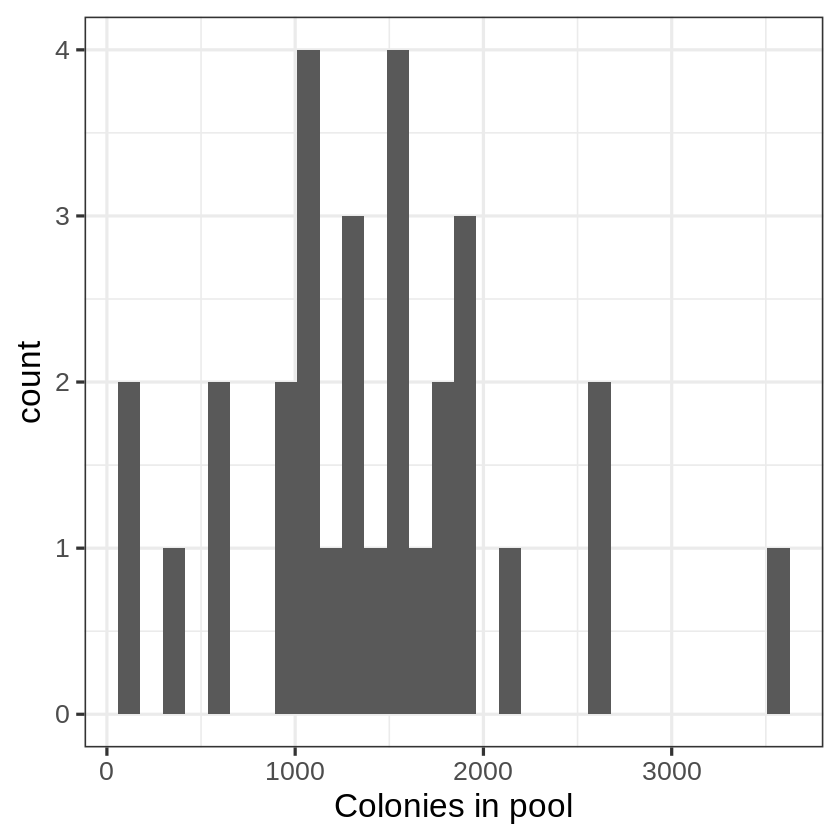

In [19]:
#| label: fig-colonies
#| fig-cap: Distribution of the number of colonies that were retrieved per cross

ggplot(Crosses_xlsx, aes(`Colonies in pool`))+
geom_histogram()+theme_bw(20)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 50 rows containing non-finite values (`stat_bin()`)."


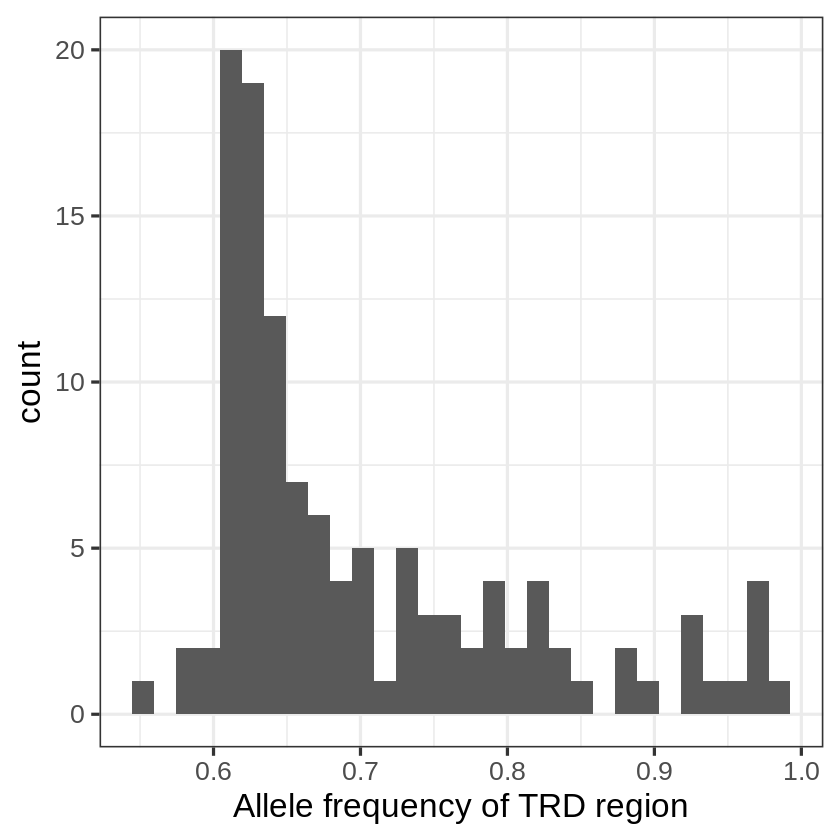

In [42]:
#| label: fig-AF
#| fig-cap: Distribution of allele frequencies of those regions classified as under distortion

ggplot(One_Table, aes(abs(AF-0.5)+0.5))+
geom_histogram()+theme_bw(20)+xlab("Allele frequency of TRD region")